# French Wikipedia, plotting classification performance

- dataset: `frwiki`
- task: _predict "bad" edits_
- models: _basic, dot and baselines_

**Goal**: plot the performance of various classifiers for the task of predicting bad edits.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.metrics import (
    precision_recall_curve, average_precision_score,
    roc_curve, roc_auc_score)

%matplotlib inline

In [2]:
from scipy.interpolate import interp1d
_xs = np.linspace(0.0, 1.0, num=200)

def plot_curves(y_true, y_pred, ax1, ax2, label):
    # Precision-recall.
    prec, rec, _ = precision_recall_curve(y_true, y_pred)
    auc = average_precision_score(y_true, y_pred)
    f = interp1d(rec, prec)
    ax1.plot(_xs, f(_xs), label="{} (AUC: {:.3f})".format(label, auc))
    # ROC.
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    f = interp1d(fpr, tpr)
    ax2.plot(_xs, f(_xs), label="{} (AUC: {:.3f})".format(label, auc))

In [3]:
with open("../data/frwiki-basic-pred.pickle", "rb") as f:
    basic = pickle.load(f)
    
with open("../data/frwiki-dot-pred.pickle", "rb") as f:
    dot = pickle.load(f)

with open("../data/frwiki-ores-reverted-pred.pickle", "rb") as f:
    ores = pickle.load(f)

with open("../data/frwiki-useronly-pred.pickle", "rb") as f:
    useronly = pickle.load(f)
    
with open("../data/frwiki-whitehill-pred.pickle", "rb") as f:
    whitehill = pickle.load(f)

Text(0,0.5,'True-positive rate')

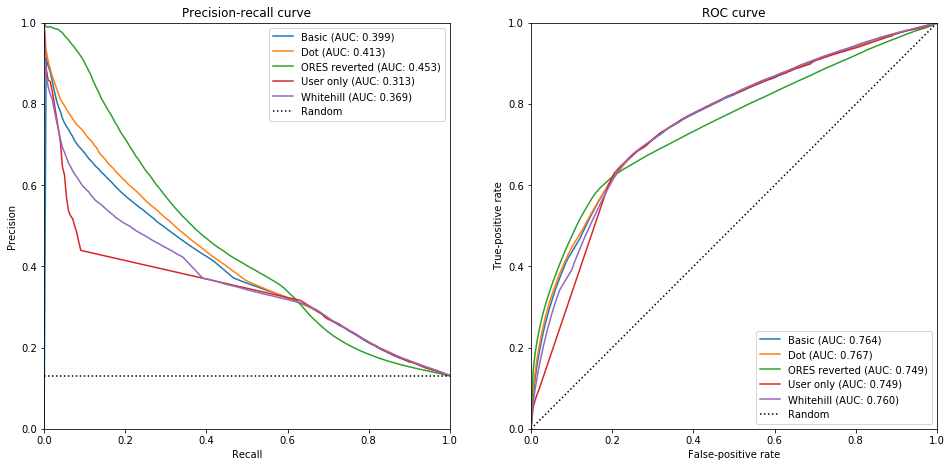

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

pred = 1 - basic["y_pred"]
label = (basic["y_true"] < 0.5).astype(int)
plot_curves(label, pred, ax1, ax2, "Basic")

pred = 1 - dot["y_pred"]
label = (dot["y_true"] < 0.5).astype(int)
plot_curves(label, pred, ax1, ax2, "Dot")

pred = ores["y_pred"]
label = (ores["y_true"] < 0.5).astype(int)
plot_curves(label, pred, ax1, ax2, "ORES reverted")

pred = 1 - useronly["y_pred"]
label = (useronly["y_true"] < 0.5).astype(int)
plot_curves(label, pred, ax1, ax2, "User only")

pred = 1 - whitehill["y_pred"]
label = (whitehill["y_true"] < 0.5).astype(int)
plot_curves(label, pred, ax1, ax2, "Whitehill")

# Baselines
label = (basic["y_true"] < 0.5).astype(int)
ax1.axhline(sum(label) / len(label), label="Random", color="k", ls=":")
ax2.plot([0., 1.0], [0., 1.0], label="Random", color="k", ls=":")

for ax in (ax1, ax2):
    ax.set_aspect("equal")
    ax.set_xlim(xmin=0.0, xmax=1.0)
    ax.set_ylim(ymin=0.0, ymax=1.0)
    ax.legend()
ax1.set_title("Precision-recall curve")
ax1.set_xlabel("Recall")
ax1.set_ylabel("Precision")
ax2.set_title("ROC curve")
ax2.set_xlabel("False-positive rate")
ax2.set_ylabel("True-positive rate")